#  Seattle Airbnb data Analysis

Seattle Airbnb homes data contains three datasets: listings, reviews , calendar. Listings datset contains all the listings of all Airbinb homes for the Seattle and their features. Calendar data their captures price, availibility for the given date. Review data has the reviews for these listings

For our analysis I have identified following questions:

## How does price varies for the listings based on the locality? 

##  Which time/month of the year are best in term of price ?

## How to arrive at pricing for the new listings?


### Dataset Loading and assessment

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import r2_score
# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
#load data
df_calendar =pd.read_csv('calendar.csv')
df_listings =pd.read_csv('listings.csv')
df_reviews =pd.read_csv('reviews.csv')
#Data loaded successfully

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print(df_calendar.info() )
df_calendar.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


(1393570, 4)

In [4]:
df_calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
print(df_listings.info(), df_listings.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
#number of unique ids
len(np.unique(df_listings['id']))

3818

In [7]:
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
print(df_reviews.info())
df_reviews.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
None


(84849, 6)

In [10]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


### To understand the relationship between three datasetslet us explore the entries for a unique listing id 

In [12]:
#Selecting listing with id -241032
df_listings[df_listings['id'] == 241032]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [13]:
df_calendar[df_calendar['listing_id']== 241032] 
#this table has availabilty & price of listings for 365 days

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [14]:
df_reviews[df_reviews['listing_id'] == 241032]
# 207 reviews for this listing by various reviewers on diffrent dates 

,listing_id,id,date,reviewer_id,reviewer_name,comments
46381,241032,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
46382,241032,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
46383,241032,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
46384,241032,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
46385,241032,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...
46386,241032,739809,2011-11-23,620277,Robin,I had a wonderful 4 night stay in Maija's apar...
46387,241032,746462,2011-11-27,1261162,Mara,The apartment was really nice and homey. It wa...
46388,241032,755647,2011-11-30,719078,Kiran,I stayed at Maija's place for 3 days and had n...
46389,241032,764019,2011-12-05,693268,Tatyana,"I did booking for my sister, and she liked the..."
46390,241032,773602,2011-12-09,1243196,Sal,We were unintentionally poor guests; we broke ...


### Based on the dataset we get following understanding of relationship between three datasets:
 - Listing data has 3818 ids of all Airbnb homes for the Seattle along with their details(92 columns)
 - Calender data has avaibility and price for the listings by date
 - Review data has the review for the listings along with reviewer name and date
 
#### ' Listing id' column is the unique key common across three data sets

# Cleaning data

In [15]:
# Cleaning calendar data
#Updating the price column from  to float
df_calendar_clean = df_calendar.copy()
df_calendar_clean['price']=df_calendar_clean['price'].replace('[\$,]', '', regex=True).astype(float)
df_calendar_clean

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,85.0


In [16]:
#df_calendar_clean[(df_calendar_clean['available']== 't')].groupby(['listing_id'])['price'].max()
df_calendar_clean[(df_calendar_clean['available']=='t')].isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

#### Calendar data is clean and can be used for analysis

In [17]:
df_reviews.isnull().sum()
# comment column have 18 null values and these value can be removed for the analyis

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [18]:
df_reviews_clean=df_reviews[~df_reviews['comments'].isnull()]

In [19]:
df_reviews_clean.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

#### Reviews data is clean and can be used for analysis

In [20]:
df_listings.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [21]:
# In order to average price, we will be converting it to float and removing the $ sign
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

#### In the listing data there are many columns with missing values. It is not clear which values should be replaced

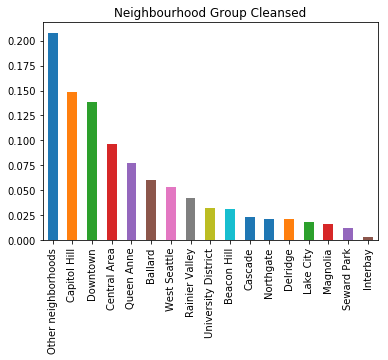

In [22]:
#Count of listings based on the neighbourhood_group_cleansed

neigh_vals = df_listings['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");

#### "Other neighborhoods" has the most number of listings followed by Capitol Hill, Downtown and Central Area

## How does price varies for the listings based on the locality ? 


In [23]:
#Price of listings based on neighbourhood

df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)


,price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474
Briarcliff,176.571429
Sunset Hill,176.055556
Industrial District,173.333333
Alki,171.619048


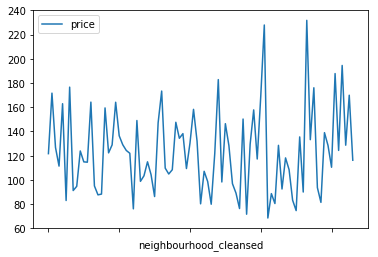

In [24]:
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();


#### Southeast Magnolia (231.70), Portage Bay(227.86) & Westlake (194.47) are neighborhood with highest price

#### South Delridge(74.67), Olympic Hills(71.69)& Rainier Beach(68.55) are neighborhood with lowest price

##  Which time/month of the year are best in term of price ?

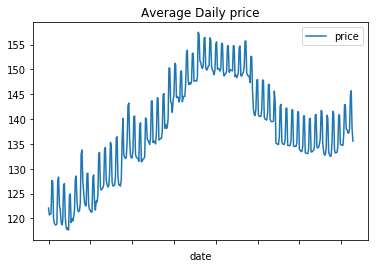

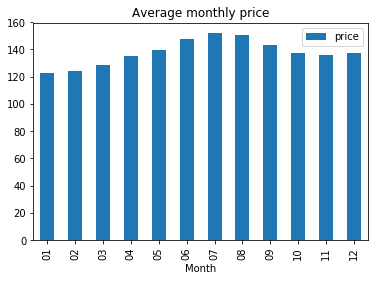

In [25]:
#Calculating Average Daily price
df_calendar_clean ['Month']= df_calendar_clean ['date'].str.split('-').str[1]
df_calendar_clean.groupby(['date'])[['price']].mean().sort_values(by='date',ascending=True)
fig=df_calendar_clean.groupby(['date'])[['price']].mean().sort_values(by='date',ascending=True).plot()
plt.title("Average Daily price");

#Calculating Average Monthly price
Avg_montly_price = df_calendar_clean.groupby(['Month'])[['price']].mean().sort_values(by='Month',ascending=True)
Avg_montly_price.plot(kind="bar");
plt.title("Average monthly price");

#### Average daily price is increasing jan to July and then starts slightly decreasing till December

#### Average monthly price is highest in month of July followed by August and June


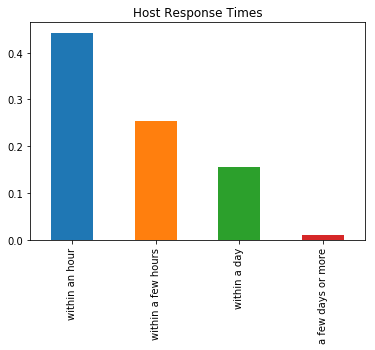

In [26]:
#Count of listings based on host_response_time

host_response_vals = df_listings['host_response_time'].value_counts()
(host_response_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Host Response Times");

#### Almost half of Host response times are within an hour and mostly within a day which is a good sign of responsivity

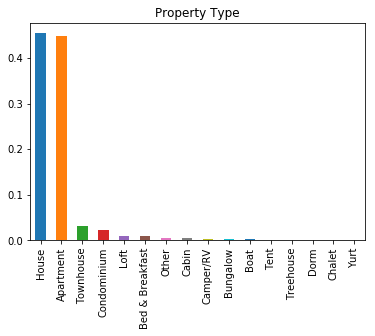

In [27]:
#Count of listings based on Property Type

property_type_vals = df_listings['property_type'].value_counts()
(property_type_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Property Type");

#### Most of Property types are houses and apartments 

## How to arrive at pricing for the new listings?

In [28]:
df_listings['price'].isnull().sum()

0

In [29]:
# Review column names and identify columns such as ids/urs that are less likely to have an impact on price
df_list = df_listings.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month']
df_list = df_list.drop(cols_less_impact, axis=1)
df_list.shape

(3818, 65)

In [30]:
# Find columns with all missing values if any 
df_list.columns[df_list.isnull().all()].tolist()

['license']

In [31]:
# Drop license column
df_list = df_list.drop('license', axis=1)
df_list.shape

(3818, 64)

In [32]:
# Review all the numerical columns and assess missing values

num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


#### Observations and missing value updates

- host_listings_count & host_total_listings_count have only 2 rows with no values; They can be updated to 1
- bathrooms, bedrooms and beds have 16, 6 and 1 missing values respectively; They can been updated to 1
- square_feet has many null values and it is also depended on the number of bedrrooms and bathrooms. So droping this column
- review_scores columns; These are review related to scores for no values updating them to 0

In [33]:
# Set 0 for bathroom where bathroom is Nan
df_list['bathrooms'] = df_list['bathrooms'].fillna(1)

# Set 1 for bedrooms where bedrooms is Nan
df_list['bedrooms'] = df_list['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
df_list['beds'] = df_list['beds'].fillna(1)

# Drop square_feet column
df_list = df_list.drop('square_feet',axis=1)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_list[col] = df_list[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
df_list['host_listings_count'] = df_list['host_listings_count'].fillna(1)
df_list['host_total_listings_count'] = df_list['host_total_listings_count'].fillna(1)



In [34]:
# Review all the categorical columns and assess missing values

cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


In [35]:
# Function to set all text fields to boolean
def set_bool_text(textdata):
    '''
    Function to set all text fields to boolean
    INPUT:
    textdata - the textdata that needs to be converted into a bool value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate presence of the text field
    
    Converts the text columns into a boolean field representing the presence or absence of the text field
    '''
    if not textdata:
        return 0
    else:
        return 1


text_host_fields = ['summary','space','neighborhood_overview','notes','transit','name','description','picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
for t in text_host_fields:
    df_list[t] = df_list[t].apply(set_bool_text)

In [36]:
# Function to set all t/f fields to 1/0
def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for t in tf_fields:
    df_list[t] = df_list[t].apply(set_bool_tf)

In [37]:
# Assign N/A to applicable host fields
df_list['host_response_time'] = df_list['host_response_time'].fillna('N/A')
df_list['host_acceptance_rate'] = df_list['host_acceptance_rate'].fillna('N/A')

df_list['host_response_rate'] = df_list['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_list['host_response_rate'] = df_list['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df_list['host_response_rate'] = df_list['host_response_rate'].fillna(0)

# Drop record with empty value for property_type
df_list = df_list.dropna(subset=['property_type'], axis=0)

# Clean security_deposit, cleaning_fee and extra people
df_list['security_deposit'] = df_list['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_list['extra_people'] = df_list['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df_list['security_deposit'] = df_list['security_deposit'].fillna(0)
df_list['cleaning_fee'] = df_list['cleaning_fee'].fillna(0)

# Drop columns experiences_offered, market and jurisdiction_name
df_list = df_list.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

# Clean up city names
df_list['city'] = df_list['city'].str.lower()
df_list['city'] = df_list['city'].str.strip()
df_list['state'] = df_list['state'].str.lower()

In [38]:

df_list['amenities']
#Amenities coulmn has number of amenities avialable in the listings seperated by ','
#These amenities can be related to price

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
5       {"Wireless Internet","Free Parking on Premises...
6       {"Wireless Internet","Free Parking on Premises...
7       {"Wireless Internet","Pets live on this proper...
8       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
9       {TV,Internet,"Wireless Internet",Kitchen,"Free...
10      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
11      {TV,"Cable TV","Wireless Internet",Kitchen,"Fr...
12      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
13      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
14      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
15      {TV,"Cable TV",Internet,Kitchen,"Free Parking ...
16      {Internet,"Wireless Internet","Pets Allowed",B...
17      {"Wire

In [39]:
# Handle amenities - Explore most common amenities
amenities = []
for index, row in df_listings.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3667),
 ('Heating', 3627),
 ('Kitchen', 3423),
 ('Smoke Detector', 3281),
 ('Essentials', 3237),
 ('Dryer', 2997),
 ('Washer', 2992),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2167),
 ('Family/Kid Friendly', 1963),
 ('First Aid Kit', 1680),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 886),
 ('Pets live on this property', 883),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 509),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 51),
 ('

#### Assuming the Amenities that are present in more than 2000 listings may impact price and can be included 

In [40]:
amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_list[c_colname] = df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [41]:
# Drop the original amenities field
df_list = df_list.drop('amenities', axis = 1)
# Review the remaining object columns
df_list.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

In [42]:
cat_fields = df_list.select_dtypes(include=['object']).columns

df_list = pd.get_dummies(df_list, columns=cat_fields)
df_list.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1


### Creating train and test data 

In [43]:
# Build out X and y, y to be price column and X to be all the other columns
y = df_list['price']
X = df_list.drop(['price'], axis=1)

# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 190) (2671,)
(1146, 190) (1146,)


In [44]:
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.6119727073658792.  The rsquared score on the test data was 0.6125553452218641.


In [45]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.sort_values('abs_coefs',ascending=False).head(10)

,est_int,coefs,abs_coefs
4,neighborhood_overview,2.529521e+16,2.529521e+16
15,host_neighbourhood,1.919355e+16,1.919355e+16
9,host_since,-1.858545e+16,1.858545e+16
10,host_location,-1.669624e+16,1.669624e+16
1,summary,1.591009e+16,1.591009e+16
3,description,-1.553475e+16,1.553475e+16
8,host_name,1.409822e+16,1.409822e+16
14,host_picture_url,1.016510e+16,1.016510e+16
5,notes,8.520817e+15,8.520817e+15
160,city_西雅图,7.916478e+15,7.916478e+15


### Regression model has been built with R2 score of 0.61 that can be used to predict the price for the new listings  and top factors for predicting the price are listed

#### Top ten drivers include the features related to location such as neighborhood, host neighborhood, host location; Other factors that were identified were related to the host such as how long host were using these platform, name of the host, availability of summary, description, notes and host picture